## ANALISIS DE DATOS AGUSTIN

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from thefuzz import fuzz #libreria para reducir las inconsistencias de las categorias

c:\Users\agust\anaconda3\lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
#This functions will help in data proccessing

def multi_reversing(df,col_id, col_values):
    """la funcion toma nos da la frecuencia de los datos distribuidos en distintas columnas.
    Toma una variable distribuida en varias columnas (one hot encoding), y aplica la funcion melt para cambiar el formato
    de la tabla a long. Luego devuelve una columna donde aparece el nombre de cada columna, la cantidad de veces que fue
    marcada con una 'x' (si accuracy fue marcada 50 veces, aparecera el str 'accuracy' 50 veces, lo que permite graficar su frecuencia
    de aparicion)

    Args:
        df (dataframe): dataframe con el que se desea trabajar, debe poseer las columnas de id_vars y list_value_vars
        in_id_vars (str): nombre de la columna que se usa como identificador de variables 
        value_vars (str o lista): str o lista con el nombre de las columnas de las cuales se desea obtener los datos (se puede
        obviamente subsetear (p.e. dataframe.iloc['columna_1',...,columna_n']))

    Returns:
        dataframe: _description_
    """
    df_raw = pd.melt(df, id_vars = col_id, value_vars = col_values)
    return df_raw[df_raw.value == 'x']

def multi_reversing_n(df,col_id, col_values):
    """exactamente lo mismo que multi_reversing, solo que para casos donde lo que se busca es un numero y no una x
    """
    df_raw = pd.melt(df, id_vars = col_id, value_vars = col_values)
    return df_raw[df_raw.value != 0]

### Emotion elicitation - Plots

 graficos para hojas: techniques:

- frecuencia por modalidad
- frecuencia por technique_name: DONE
- task activo or passive: DONE
- por modalidad visual (pictures, videos, words, other)
- por modalidad auditiva (musica otro)
- elicitation time
- multiple techniques?
- frecuencia desde driving a puzzle

In [3]:
#Import data
data_elicitation = pd.read_csv('../update_data/Tabla Normalizada - Emotion elicitation techniques.csv')
data_elicitation.fillna('-', inplace= True)

In [4]:
elicitation_techq = data_elicitation[data_elicitation['technique_name']!= '-']  #me quedo solo con las rows que usaron tecnicas estandarizadas


In [5]:
#me quedo con la primera row de cada grupo
elicitation_techq = elicitation_techq.groupby(['paper_id', 'technique_name']).nth(0)

elicitation_techq.reset_index(inplace= True)

In [6]:
# Unifico las categorias y resuelvo las inconsistencias por diferencias de tipeo o abreviaciones
mapping = {
    'Stroop color-word interference test’’ (SCWT)':'Stoop color word interfence test (SCWT)',
    'TSST':'Trier Social Stress Test (TSST)',
    'Trier social stress test' : 'Trier Social Stress Test (TSST)'
        }

elicitation_techq['technique_name'] = elicitation_techq['technique_name'].replace(mapping)
elicitation_techq['technique_name'].value_counts()

IAPS                                       10
Trier Social Stress Test (TSST)             3
survival task                               2
Stoop color word interfence test (SCWT)     2
Rapid-ABC play protocol                     1
Flickr                                      1
IADS                                        1
Robin                                       1
-G25\r\nLogitech steering wheel kit         1
Visit website with interruptions            1
Stroop                                      1
Name: technique_name, dtype: int64

In [7]:
elicitation_techq['technique_name'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

IAPS                                       41.7%
Trier Social Stress Test (TSST)            12.5%
survival task                               8.3%
Stoop color word interfence test (SCWT)     8.3%
Rapid-ABC play protocol                     4.2%
Flickr                                      4.2%
IADS                                        4.2%
Robin                                       4.2%
-G25\r\nLogitech steering wheel kit         4.2%
Visit website with interruptions            4.2%
Stroop                                      4.2%
Name: technique_name, dtype: object

c:\Users\agust\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\agust\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


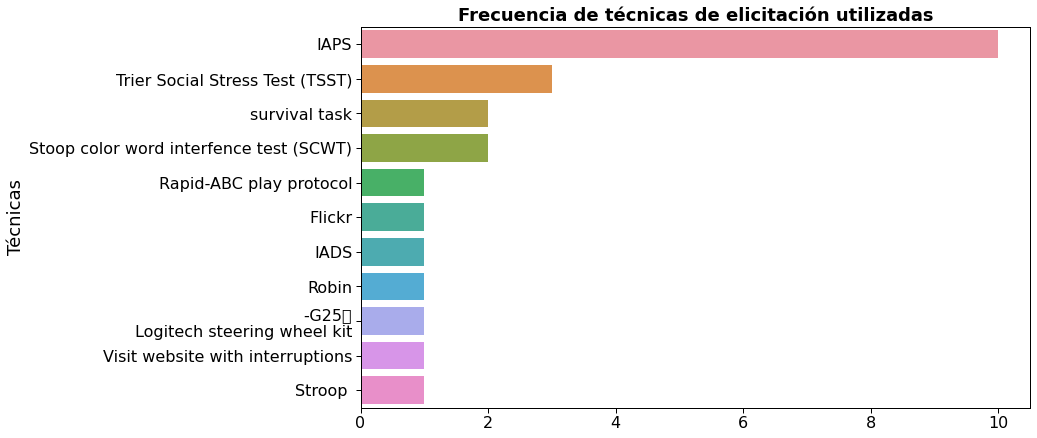

In [8]:
#Plot
plt.figure(figsize = (12,7))
sns.set_context('paper')
sns.countplot(y = 'technique_name',
            data = elicitation_techq,
            order = elicitation_techq['technique_name'].value_counts().index)
plt.title('Frecuencia de técnicas de elicitación utilizadas', fontweight = 'bold', fontsize = 18)
plt.xlabel('')
plt.ylabel('Técnicas', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

#### Task ACTIVE or PASSIVE

In [9]:
type_task = data_elicitation.groupby(['paper_id', 'task_type_active','task_type_pasive']).nth(0)
type_task.reset_index(inplace= True)

In [10]:
#### Task ACTIVE or PASSIVE
task_type = multi_reversing(type_task, 'model_id', type_task[['task_type_active','task_type_pasive']])
task_type['variable'].value_counts()


task_type_pasive    66
task_type_active    20
Name: variable, dtype: int64

In [11]:
task_type['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

task_type_pasive    76.7%
task_type_active    23.3%
Name: variable, dtype: object

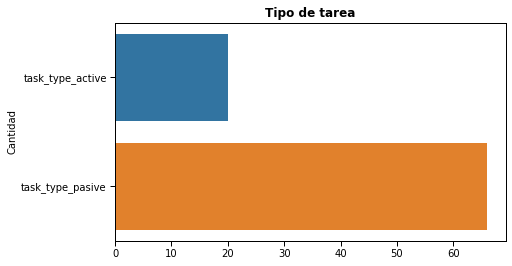

In [12]:
#Plot
plt.figure(figsize = (7,4))
sns.countplot(y = 'variable',
            data = task_type)
plt.title('Tipo de tarea',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('Cantidad', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

#### FRECUENCY BY MODALITY

In [13]:
freq_modality = data_elicitation.groupby(['paper_id','is_multimodal','modality_visual','modality_auditory', 'modality_somatosensory']).nth(0)
freq_modality.reset_index(inplace=True)

In [14]:
df_modality = multi_reversing(freq_modality, 'model_id', freq_modality[['is_multimodal','modality_visual','modality_auditory', 'modality_somatosensory']])
df_modality['variable'].value_counts()

is_multimodal             64
modality_visual           23
modality_auditory         12
modality_somatosensory     1
Name: variable, dtype: int64

In [15]:
number_modality = sum(df_modality['variable'].value_counts())
print (f'Se hallaron {number_modality} instancias en total entre multimodal, visual, auditory y somatosensory.')

Se hallaron 100 instancias en total entre multimodal, visual, auditory y somatosensory.


In [16]:
df_modality['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

is_multimodal             64.0%
modality_visual           23.0%
modality_auditory         12.0%
modality_somatosensory     1.0%
Name: variable, dtype: object

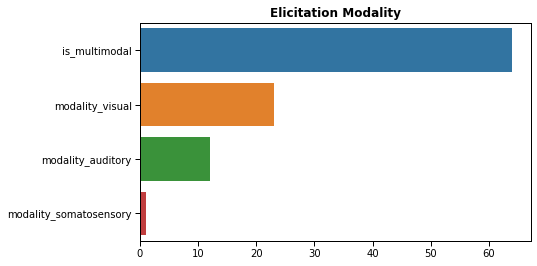

In [17]:
#Plot
plt.figure(figsize = (7,4))
sns.set_context('paper')
sns.countplot(y = 'variable',
            data = df_modality)
plt.title('Elicitation Modality',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

#### By visual modality (pictures, videos, words, other)

In [18]:
visual_type = data_elicitation.groupby(['paper_id','visual_pictures', 'visual_videos', 'visual_words', 'visual_other']).nth(0)
##Acá se podría crear otra columna que sea "both visual and auditory"
visual_type.reset_index(inplace=True)

In [19]:
df_visual_modality = multi_reversing(visual_type, 'model_id', visual_type.loc[:,'visual_pictures':'visual_other'])
df_visual_modality['variable'].value_counts()

visual_videos      56
visual_pictures    16
visual_words        2
visual_other        2
Name: variable, dtype: int64

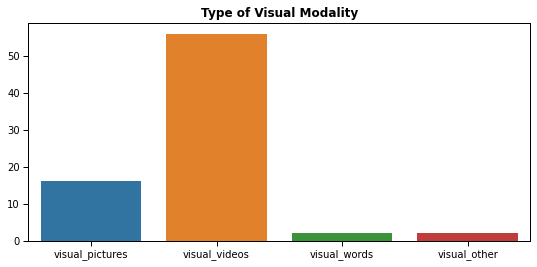

In [20]:
#Plot
plt.figure(figsize = (9,4))
sns.countplot(x = 'variable',
            data = df_visual_modality)
plt.title('Type of Visual Modality',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

#### Frecuencia desde driving a puzzle

In [21]:
freq_from_driving = data_elicitation.groupby(['paper_id','technique_clasif_driving','technique_clasif_Imagination techniques /memory recall',
    'technique_clasif_Social interactions', 'technique_clasif_Virtual Reality', 'technique_clasif_Meditation', 
    'technique_clasif_Reading', 'technique_clasif_Ux', 'technique_clasif_TEM clips (Tactile Enhanced Multimedia)',
     'technique_clasif_Videogame', 'technique_clasif_Puzzle']).nth(0)

In [22]:
freq_from_driving.reset_index(inplace=True)

In [23]:
other_classification_tech = multi_reversing(freq_from_driving, 'model_id',freq_from_driving.loc[:, 'technique_clasif_driving':'technique_clasif_Puzzle'])

In [24]:
other_classification_tech['variable'].value_counts()

technique_clasif_driving                                    4
technique_clasif_Social interactions                        4
technique_clasif_Meditation                                 2
technique_clasif_Virtual Reality                            1
technique_clasif_Reading                                    1
technique_clasif_Ux                                         1
technique_clasif_TEM clips (Tactile Enhanced Multimedia)    1
technique_clasif_Videogame                                  1
Name: variable, dtype: int64

In [25]:
other_classification_tech['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

technique_clasif_driving                                    26.7%
technique_clasif_Social interactions                        26.7%
technique_clasif_Meditation                                 13.3%
technique_clasif_Virtual Reality                             6.7%
technique_clasif_Reading                                     6.7%
technique_clasif_Ux                                          6.7%
technique_clasif_TEM clips (Tactile Enhanced Multimedia)     6.7%
technique_clasif_Videogame                                   6.7%
Name: variable, dtype: object

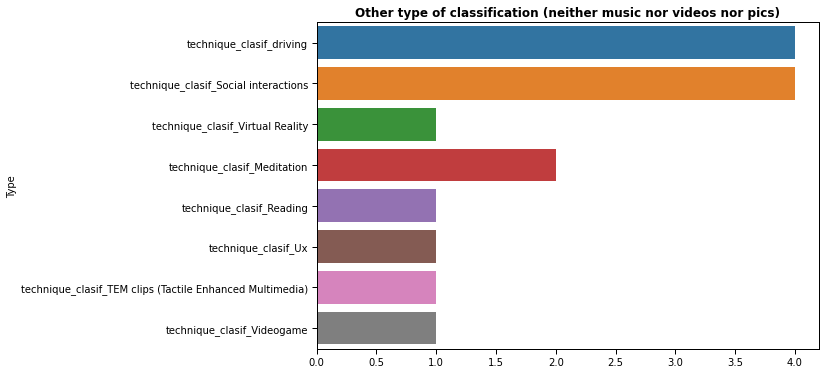

In [26]:
#Plot
plt.figure(figsize = (9,6))
sns.countplot(y = 'variable',
            data = other_classification_tech)
plt.title('Other type of classification (neither music nor videos nor pics)',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('Type', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

#### EDA

In [27]:
#Import data
df_eda = pd.read_csv('../update_data/Tabla Normalizada - EDA.csv')
df_eda = df_eda.fillna('-')
eda_devices = df_eda[df_eda['eda_device_specification']!= '-']  #me quedo solo con las rows que usaron dispositivos

In [28]:
eda_devices = eda_devices.groupby(['paper_id', 'eda_device_specification']).nth(0)
eda_devices.reset_index(inplace=True)

In [29]:
eda_devices['eda_device_specification'].value_counts()

Biosemi ActiveTwo                           10
Biosemi activeTwo                            9
Shimmer 2R                                   8
Shimmer                                      3
Empatica E4                                  3
                                            ..
Shimmer3 GSR+ Unit sensor                    1
Nexus 4 Biofeedback system3                  1
Bodymedia                                    1
ProComp Infinity                             1
(BITalino (r)evolution Plugged\r\nKit BT     1
Name: eda_device_specification, Length: 61, dtype: int64

In [30]:
# REDUCIMOS LAS CATEGORÍAS AGRUPANDOLAS
main_categories = ['BIOPAC', 'Empatica','GSR2','Sociograph', 'Variport', 'Shimmer', 'BioRadio 150', 'Affectiva-QSensors5','ProComp Infinity','PowerLab', 'Grove']

def reduce_categories(list_categories):
    '''
    esta función toma una lista de categorias y reemplaza por ellas a las rows con categorías similares
    
    ej: reemplaza por BIOPAC a 'BIOPAC 150'

    '''
    for category in list_categories:
        for i in eda_devices.loc[:,'eda_device_specification']:
            if fuzz.ratio(category, i) > 45:
                eda_devices.loc[:,'eda_device_specification'] = eda_devices.loc[:,'eda_device_specification'].replace({i:category})

# Reducimos algunas categorías a partir de la funcion reduce_categories
reduce_categories(main_categories)

# Aún quedan algunas categorias sin unificar asi que unifico las restantes y resuelvo las inconsistencias por diferencias de tipeo o abreviaciones
mapping_eda = {
    'MP150 Biopac': 'BIOPAC', 'MP35 Biopac' : 'BIOPAC','MP150':'BIOPAC','Biopac\r\nMP36' : 'BIOPAC',
    'Biosemi activeTwo' : 'Biosemi ActiveTwo', 'Biosemi ActiveTwo ':'Biosemi ActiveTwo',
    'PowerLab (manufactured\r\nby ADInstruments)': 'PowerLab',
    'Affectiva-QSensors5': 'Q Sensor by Afectiva',
    'Shimmer3 GSR+ Unit sensor':'Shimmer',
    'sensors produced by Thought Technology' : 'Thought Technology',
    'Grove\r\n(a standalone LM324 quadruple operational amplifier based on EDA sensor kit)':'Grove',
    'Grove GSR sensor produced by Seeed':'Grove',
    'Gen II integrated wearable device from Analog Devices, Inc': 'Gen II Analog Devices',
    'e-Health Sensor\nPlatform V2.0' : 'e-Health Sensor Platform V2.0',
    '(BITalino (r)evolution Plugged\r\nKit BT':'(BITalino (r)evolution Plugged Kit BT ',
    'Nexus-10' : 'NEXUS', 'Nexus 4 Biofeedback system3':'NEXUS' #NO ESTOY SEGURO SI ESTO REALMENTE SON LO MISMO, O SIQUIERA SI NEXUS ES LA MARCA
                }


eda_devices.loc[:,'eda_device_specification'] = eda_devices.loc[:,'eda_device_specification'].replace(mapping_eda)



In [31]:
eda_devices['eda_device_specification'].value_counts()

Biosemi ActiveTwo                               19
BIOPAC                                          17
Shimmer                                         16
Empatica                                         7
BioRadio 150                                     4
PowerLab                                         4
Grove                                            3
GSR2                                             3
ProComp Infinity                                 3
Q Sensor by Afectiva                             3
Sociograph                                       2
Commercial bluetooth sensor                      2
NEXUS                                            2
Variport                                         2
BioNeuro multichannel biofeedback instrument     1
Nexus-32                                         1
Thought Technology                               1
Mindfield eSense                                 1
e-Health Sensor Platform V2.0                    1
Biosignalplux                  

In [32]:
#In percentage
#Plot
eda_devices['eda_device_specification'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Biosemi ActiveTwo                               19.2%
BIOPAC                                          17.2%
Shimmer                                         16.2%
Empatica                                         7.1%
BioRadio 150                                     4.0%
PowerLab                                         4.0%
Grove                                            3.0%
GSR2                                             3.0%
ProComp Infinity                                 3.0%
Q Sensor by Afectiva                             3.0%
Sociograph                                       2.0%
Commercial bluetooth sensor                      2.0%
NEXUS                                            2.0%
Variport                                         2.0%
BioNeuro multichannel biofeedback instrument     1.0%
Nexus-32                                         1.0%
Thought Technology                               1.0%
Mindfield eSense                                 1.0%
e-Health Sensor Platform V2.

¿Cuantos dipositivos de eda diferentes se utilizaron?

In [33]:
n_dispositivos_eda = eda_devices['eda_device_specification'].nunique()
print (f'Se utilizaron {n_dispositivos_eda} dispositivos de EDA diferentes')

Se utilizaron 26 dispositivos de EDA diferentes


¿En cuántas instancias de nuestro interés se especificó el dispositivo de EDA utilizado?

In [34]:
number_eda = sum(eda_devices['eda_device_specification'].value_counts())
print (f' Tenemos {number_eda} de instancias donde se aclaró el dispositivo de EDA utilizado.')

 Tenemos 99 de instancias donde se aclaró el dispositivo de EDA utilizado.


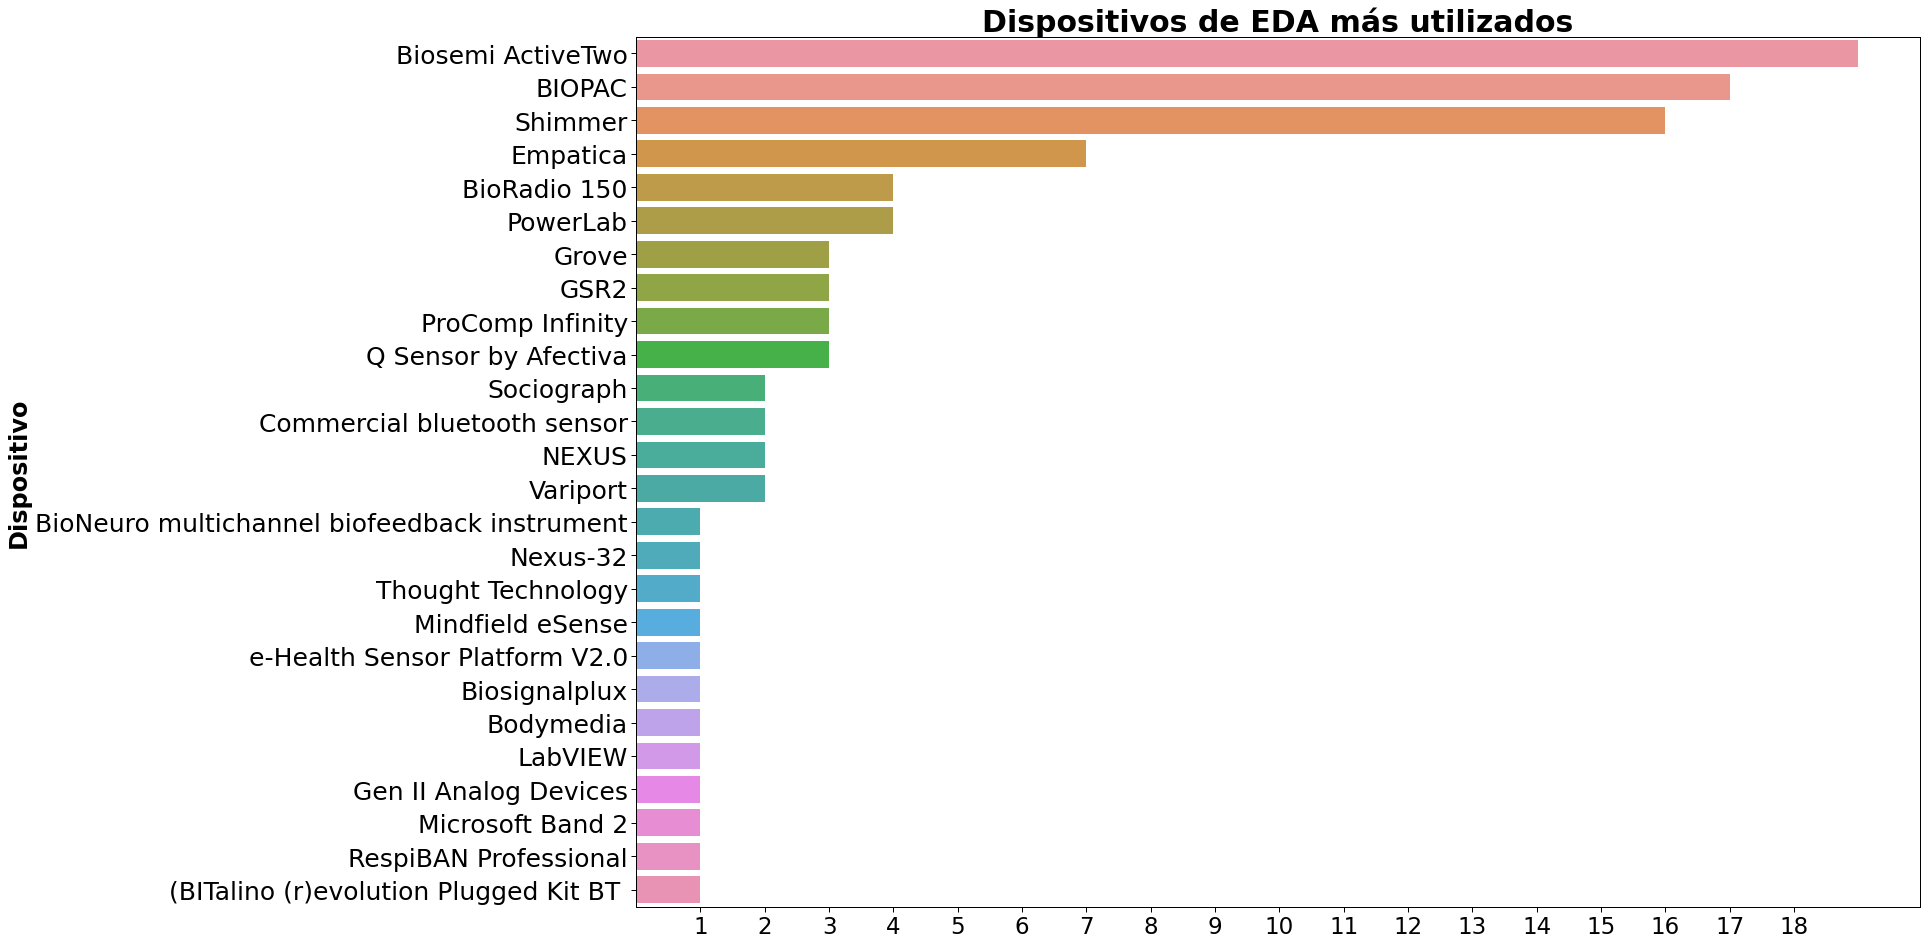

In [35]:
#Plot
from turtle import width


plt.figure(figsize = (23,16))
sns.set_context('paper')
sns.countplot(y = 'eda_device_specification',
            data = eda_devices,
            order = eda_devices['eda_device_specification'].value_counts().index)
plt.title('Dispositivos de EDA más utilizados',
            fontweight = 'bold',
            fontsize = 30)
plt.ylabel('Dispositivo',
            fontsize = 24,
            fontweight = 'bold')
plt.xlabel('')
plt.yticks(fontsize = 25)
plt.xticks(ticks = range(1,19), fontsize = 23)
plt.show()

In [36]:
#Aquellos que tenian una frecuencia de 4 o menos los agrupamos en 'Others'
mapping_others ={
        'Commercial bluetooth sensor' : 'Others (<2)',
        'Variport' : 'Others (<2)',
        'Sociograph': 'Others (<2)',
        'NEXUS': 'Others (<2)',
        'Mindfield eSense': 'Others (<2)',
        'BioNeuro multichannel biofeedback instrument': 'Others (<2)',
        'Thought Technology': 'Others (<2)',
        'e-Health Sensor\nPlatform V2.0': 'Others (<2)',
        'Bodymedia': 'Others (<2)',
        'LabVIEW': 'Others (<2)',
        'Biosignalplux': 'Others (<2)',
        'Gen II Analog Devices': 'Others (<2)',
        'Microsoft Band 2': 'Others (<2)',
        'RespiBAN Professional': 'Others (<2)',
        '(BITalino (r)evolution Plugged\r\nKit BT': 'Others (<2)'}

devices_with_others = eda_devices.copy()

devices_with_others.loc[:,'eda_device_specification'] = devices_with_others.loc[:,'eda_device_specification'].replace(mapping_others)
devices_with_others['eda_device_specification'].value_counts()


Biosemi ActiveTwo                         19
Others (<2)                               17
BIOPAC                                    17
Shimmer                                   16
Empatica                                   7
BioRadio 150                               4
PowerLab                                   4
Q Sensor by Afectiva                       3
Grove                                      3
ProComp Infinity                           3
GSR2                                       3
e-Health Sensor Platform V2.0              1
Nexus-32                                   1
(BITalino (r)evolution Plugged Kit BT      1
Name: eda_device_specification, dtype: int64

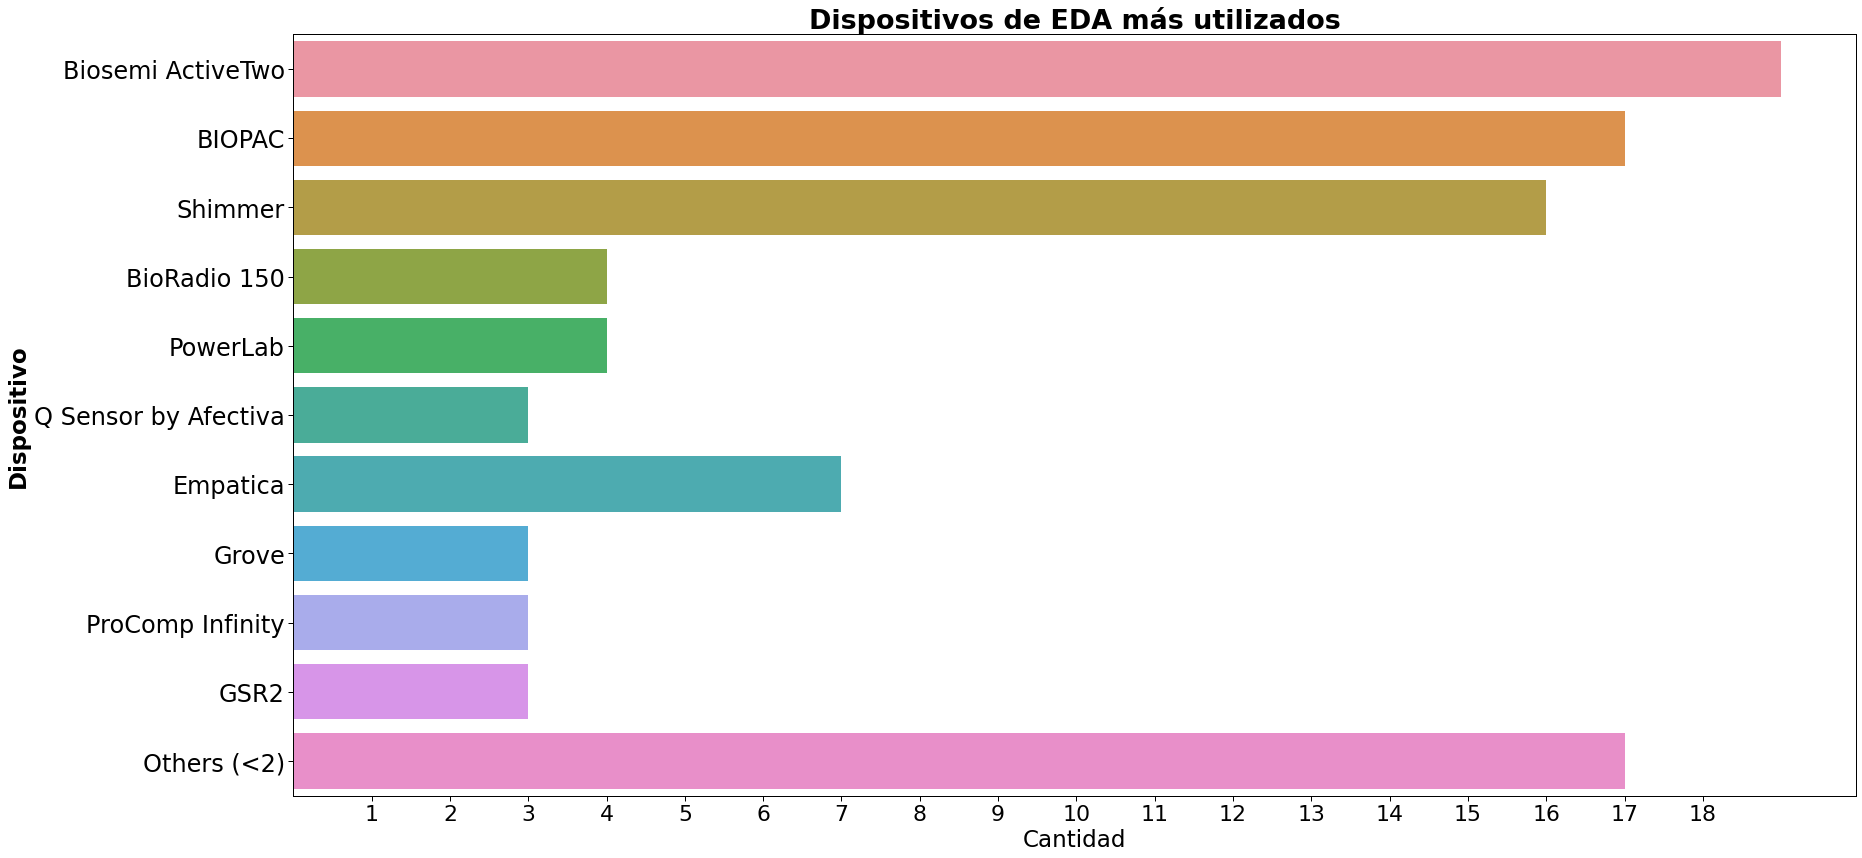

In [37]:
#Orden
plot_order = ['Biosemi ActiveTwo','BIOPAC', 'Shimmer', 'BioRadio 150', 'PowerLab', 'Q Sensor by Afectiva' , 'Empatica', 'Grove', 'ProComp Infinity', 'GSR2', 'Others (<2)']

#Plot
plt.figure(figsize = (28,14))
sns.set_context('paper')
sns.countplot(y = 'eda_device_specification',
            data = devices_with_others,
            order = plot_order)
plt.title('Dispositivos de EDA más utilizados',
            fontweight = 'bold',
            fontsize = 27)
plt.ylabel('Dispositivo', fontsize = 23,fontweight = 'bold')
plt.xlabel('Cantidad', fontsize = 23)
plt.yticks(fontsize = 24)
plt.xticks(ticks = range(1,19), fontsize = 22)
plt.show()

In [38]:
df_statistical_learning_models = pd.read_csv('../update_data/Tabla Normalizada - Statistical Learning model.csv')
df_statistical_learning_models=df_statistical_learning_models.fillna('-')

In [39]:
stats_and_affective_model = df_statistical_learning_models.groupby(['paper_id', 'affective_model']).nth(0)
stats_and_affective_model.reset_index(inplace=True)
stats_and_affective_model['affective_model'].value_counts()

dimensional    68
categorical    40
Name: affective_model, dtype: int64

In [40]:
stats_and_affective_model['affective_model'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

dimensional    63.0%
categorical    37.0%
Name: affective_model, dtype: object

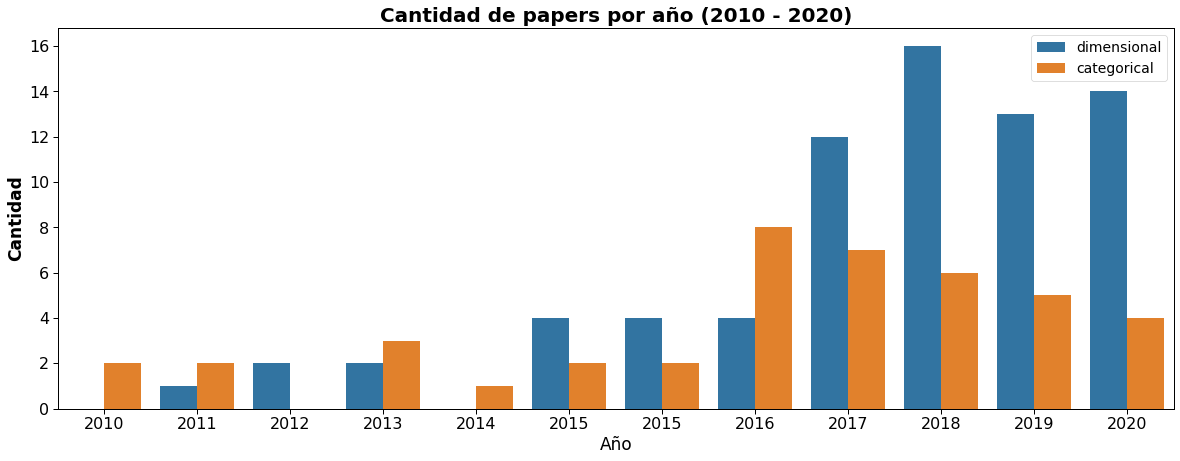

In [41]:
#ploteo
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
plt.figure(figsize = (20,7))
sns.countplot(x='year', 
    data= stats_and_affective_model, 
    hue='affective_model', 
    order=category_order)
plt.title('Cantidad de papers por año (2010 - 2020)',
            fontweight = 'bold',
            fontsize = 20)
plt.ylabel('Cantidad', fontsize = 17,fontweight = 'bold')
plt.xlabel('Año', fontsize = 17)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.legend (fontsize = 14)
plt.show()

In [42]:
data_type = pd.read_csv ('../update_data/Tabla Normalizada - Data type.csv')
data_type = data_type.fillna('-')
data_base = data_type.groupby(['paper_id', 'db_type']).nth(0)
data_base.reset_index(inplace=True)


In [43]:
#Modifico los valores de la columna db_type
data_base['db_type'] = data_base['db_type'].replace ({'private': 'Datos propios', 'public': 'Base de datos'})
data_base['db_type'].value_counts()

Datos propios    59
Base de datos    42
Name: db_type, dtype: int64

In [44]:
data_base['db_type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Datos propios    58.4%
Base de datos    41.6%
Name: db_type, dtype: object

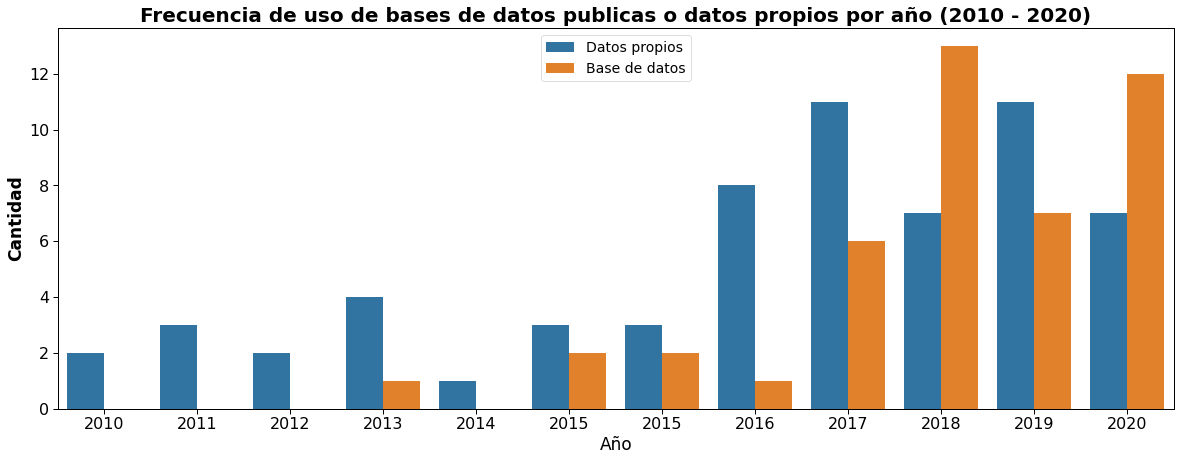

In [45]:

plt.figure(figsize = (20,7))
sns.set_context('paper')
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
sns.countplot(x='year', 
    data= data_base, 
    hue='db_type', 
    order=category_order)

plt.title('Frecuencia de uso de bases de datos publicas o datos propios por año (2010 - 2020)',
            fontweight = 'bold',
            fontsize =20)
plt.ylabel('Cantidad', fontsize = 17,fontweight = 'bold')
plt.xlabel('Año', fontsize = 17)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.legend (fontsize = 14)
plt.show()

In [46]:
freq_data_base = data_type.groupby(['paper_id','DEAP', 'AMIGOS', 'MAHNOB', 'CASE',
       'Ascertain', 'Cog.load', 'Multimodal Dyadic Behavior (MMDB)', 'RECOLA',
       'DECAF', 'Driving Workload', '(AV+EC) 2015', 'Liris', 'SenseEmotion',
       'PMEmo', 'AFEW', 'Hazumi1911', 'Bio Vid Emo DB', 'RCDAT', 'DREAMER']).nth(0)
freq_data_base.reset_index(inplace=True)


db_freq = multi_reversing(freq_data_base, 'model_id', freq_data_base[['DEAP', 'AMIGOS', 'MAHNOB', 'CASE',
       'Ascertain', 'Cog.load', 'Multimodal Dyadic Behavior (MMDB)', 'RECOLA',
       'DECAF', 'Driving Workload', '(AV+EC) 2015', 'Liris', 'SenseEmotion',
       'PMEmo', 'AFEW', 'Hazumi1911', 'Bio Vid Emo DB', 'RCDAT', 'DREAMER']])
db_freq['variable'].value_counts()

DEAP                                 10
MAHNOB                                9
AMIGOS                                8
PMEmo                                 3
Ascertain                             2
RECOLA                                2
Cog.load                              1
Multimodal Dyadic Behavior (MMDB)     1
Driving Workload                      1
(AV+EC) 2015                          1
Liris                                 1
AFEW                                  1
Hazumi1911                            1
Bio Vid Emo DB                        1
RCDAT                                 1
Name: variable, dtype: int64

¿En cuantas ocasiones se recurrió a bases de datos?

In [47]:
number_db= sum(db_freq['variable'].value_counts())
print (f'Se utilizaron bases de datos en {number_db} instancias de nuestro interés.')

Se utilizaron bases de datos en 43 instancias de nuestro interés.


In [48]:
db_freq['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

DEAP                                 23.3%
MAHNOB                               20.9%
AMIGOS                               18.6%
PMEmo                                 7.0%
Ascertain                             4.7%
RECOLA                                4.7%
Cog.load                              2.3%
Multimodal Dyadic Behavior (MMDB)     2.3%
Driving Workload                      2.3%
(AV+EC) 2015                          2.3%
Liris                                 2.3%
AFEW                                  2.3%
Hazumi1911                            2.3%
Bio Vid Emo DB                        2.3%
RCDAT                                 2.3%
Name: variable, dtype: object

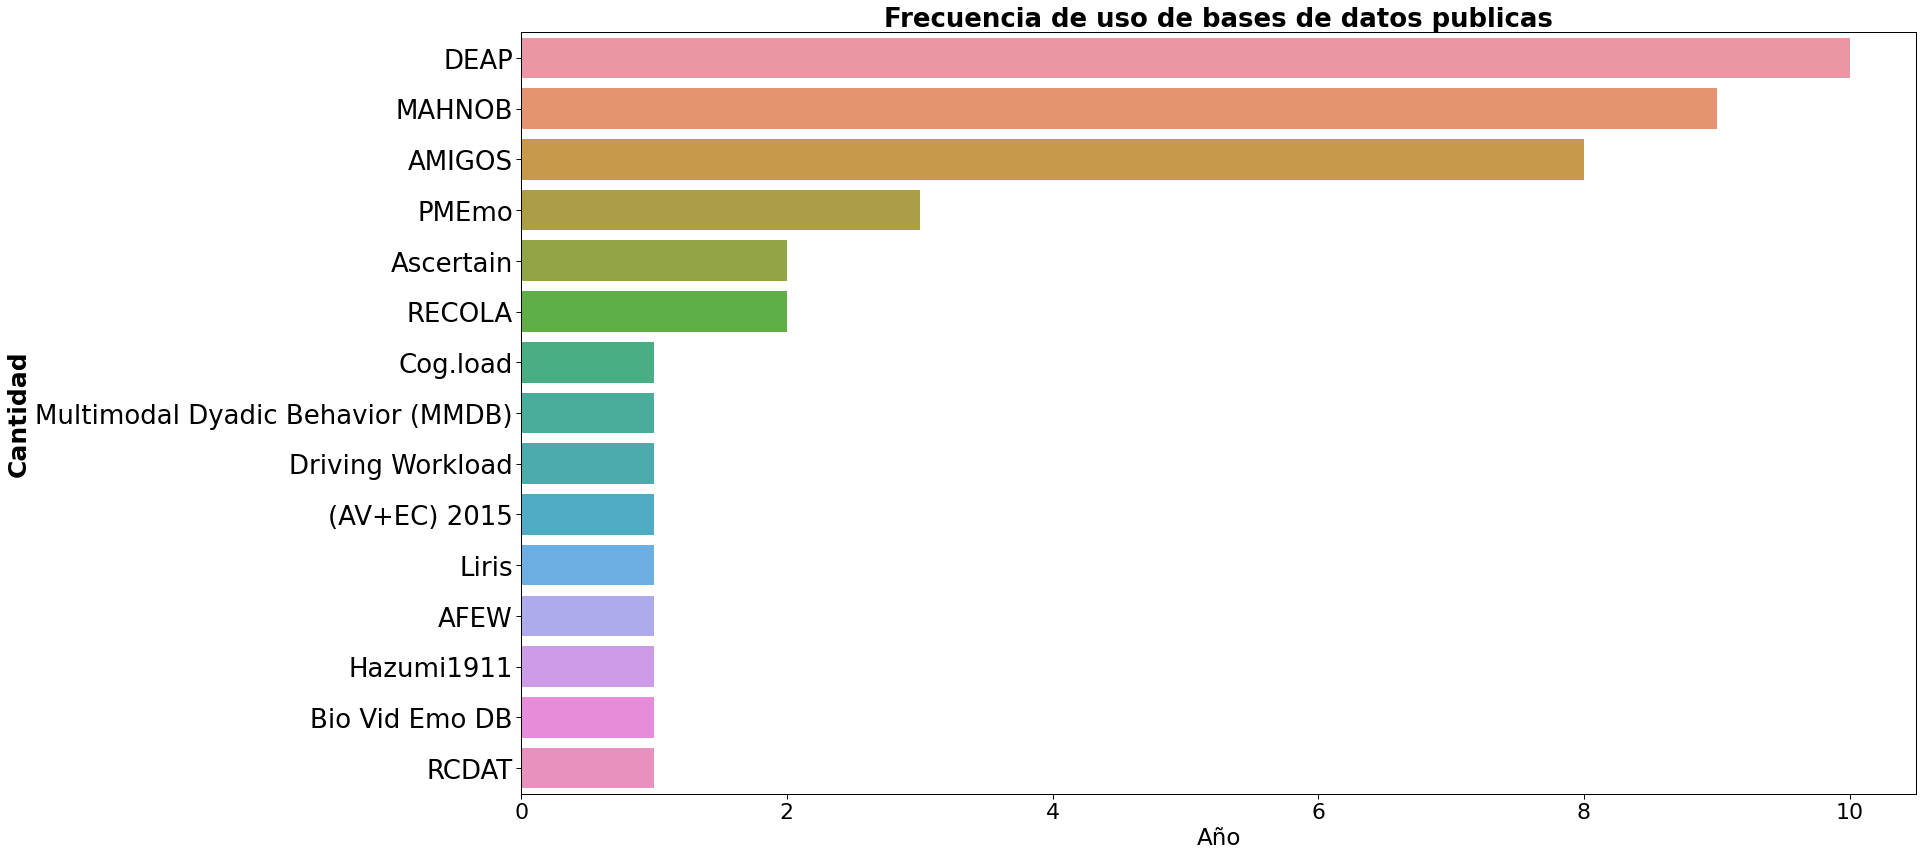

In [49]:

plt.figure(figsize = (25,14))
sns.set_context('paper')
sns.countplot(y='variable',
            data=db_freq,
            order = db_freq.variable.value_counts().index)

plt.title('Frecuencia de uso de bases de datos publicas',
            fontweight = 'bold',
            fontsize =26)
plt.ylabel('Cantidad', fontsize = 25,fontweight = 'bold')
plt.xlabel('Año', fontsize = 23)
plt.yticks(fontsize = 26)
plt.xticks(fontsize = 22)
plt.show()

HASTA ACÁ ES LO MIO

In [50]:
self = pd.read_csv('../update_data/Tabla Normalizada - Self report.csv')

In [51]:
self.columns

Index(['paper_id', 'model_id', 'apa_citation', 'use_questionnaite',
       'affective_questionaire_SAM', 'affective_questionaire_PSS',
       'affective_questionaire_PANAS', 'affective_questionaire_DES',
       'affective_questionaire_affective_grid', 'is_dimensional',
       'dimension_valence', 'dimension_arousal', 'dimension_dominance',
       'dimension_like_or_dislike', 'dimension_familiarity',
       'dimension_stress', 'dimension_engagement', 'dimension_predictability',
       'is_categorial', 'Anger', 'Stress', 'Disgust', 'Fear', 'Sadness',
       'Surprise', 'Happiness', 'Pleasant', 'Unpleasant', 'Anxiety', 'Neutral',
       'Funny', 'Horror', 'Weepy', 'Boredom', 'Relaxation', 'Amusement',
       'Confusion', 'Curiosity', 'Delight', 'flow/engagement', 'Frustration',
       'Tenderness', 'Joy'],
      dtype='object')

In [52]:
self.fillna('-', inplace= True)

In [53]:
self_1 = self[self['is_categorial']!= '-']

In [54]:
self_1

,paper_id,model_id,apa_citation,use_questionnaite,affective_questionaire_SAM,affective_questionaire_PSS,affective_questionaire_PANAS,affective_questionaire_DES,affective_questionaire_affective_grid,is_dimensional,...,Boredom,Relaxation,Amusement,Confusion,Curiosity,Delight,flow/engagement,Frustration,Tenderness,Joy
4,4,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",Yes,x,-,-,-,-,x,...,-,-,x,-,-,-,-,-,-,x
5,4,6,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",Yes,x,-,-,-,-,x,...,-,-,x,-,-,-,-,-,-,x
6,4,7,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",Yes,x,-,-,-,-,x,...,-,-,x,-,-,-,-,-,-,x
7,4,8,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",Yes,x,-,-,-,-,x,...,-,-,x,-,-,-,-,-,-,x
8,4,9,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",Yes,x,-,-,-,-,x,...,-,-,x,-,-,-,-,-,-,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,96,487,"Yang, H. C., & Lee, C. C. (2019, September). A...",Yes,x,-,x,-,-,x,...,-,-,-,-,-,-,-,-,-,-
487,96,488,"Yang, H. C., & Lee, C. C. (2019, September). A...",Yes,x,-,x,-,-,x,...,-,-,-,-,-,-,-,-,-,-
488,96,489,"Yang, H. C., & Lee, C. C. (2019, September). A...",Yes,x,-,x,-,-,x,...,-,-,-,-,-,-,-,-,-,-
489,96,490,"Yang, H. C., & Lee, C. C. (2019, September). A...",Yes,x,-,x,-,-,x,...,-,-,-,-,-,-,-,-,-,-


In [55]:
#me quedo con la primera row de cada grupo
self_uniq = self_1.groupby(['paper_id','Anger',
       'Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise', 'Happiness',
       'Pleasant', 'Unpleasant', 'Anxiety', 'Neutral', 'Funny', 'Horror',
       'Weepy', 'Boredom', 'Relaxation', 'Amusement', 'Confusion', 'Curiosity',
       'Delight', 'flow/engagement', 'Frustration', 'Tenderness', 'Joy']).nth(0)

In [56]:
self_uniq

model_id  \
paper_id Anger Stress Disgust Fear Sadness Surprise Happiness Pleasant Unpleasant Anxiety Neutral Funny Horror Weepy Boredom Relaxation Amusement Confusion Curiosity Delight flow/engagement Frustration Tenderness Joy             
4        x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x           5   
10       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x          44   
16       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x          93   
20       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x         130   
32       x     -      x       x    x       x        x         -        -          -       x       -     -      -     -       -          -         -         -         -       -               -           -          -         179   
35       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x         195   
37       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x         228   
                                                    x         -        -          -       x       -     -      -     -       -          -         -         -         -       -               -           -          -         235   
43       -     -      -       -    -       -        -         -        -          -       x       x     -      -     -       -          -         -         -         -       -               -           -          -         261   
60       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x         304   
61       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x         315   
62       -     -      -       -    -       -        -         -        -          -       -       -     -      -     x       -          -         -         -         -       -               -           -          -         330   
63       -     -      -       -    -       -        -         -        -          -       -       -     -      -     -       x          -         -         -         -       -               -           -          -         333   
65       x     -      x       x    x       x        x         -        -          -       x       -     -      -     -       -          -         -         -         -       -               -           -          -         344   
68       -     -      -       -    -       -        -         -        -          x       -       -     -      -     -       -          -         -         -         -       -               -           -          -         358   
70       x     -      x       x    x       x        -         -        -          x       x       -     -      -     -       -          x         -         -         -       -               -           -          x         360   
72       x     -      x       x    x       x        x         -        -      

In [57]:
self_uniq.reset_index(inplace=True)

In [58]:
self_uniq

,paper_id,Anger,Stress,Disgust,Fear,Sadness,Surprise,Happiness,Pleasant,Unpleasant,...,is_dimensional,dimension_valence,dimension_arousal,dimension_dominance,dimension_like_or_dislike,dimension_familiarity,dimension_stress,dimension_engagement,dimension_predictability,is_categorial
0,4,x,-,x,x,x,x,-,-,-,...,x,x,x,x,-,-,-,-,x,x
1,10,x,-,x,x,x,x,-,-,-,...,x,x,x,x,-,-,-,-,x,x
2,16,x,-,x,x,x,x,-,-,-,...,x,x,x,x,-,-,-,-,x,x
3,20,x,-,x,x,x,x,-,-,-,...,x,x,x,x,-,-,-,-,x,x
4,32,x,-,x,x,x,x,x,-,-,...,x,x,x,x,x,x,-,-,-,x
5,35,x,-,x,x,x,x,-,-,-,...,x,x,x,x,-,-,-,-,x,x
6,37,x,-,x,x,x,x,-,-,-,...,x,x,x,x,-,-,-,-,x,x
7,37,x,-,x,x,x,x,x,-,-,...,x,x,x,x,x,x,-,-,-,x
8,43,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,x
9,60,x,-,x,x,x,x,-,-,-,...,x,x,x,x,-,-,-,-,x,x


In [59]:
self_uniq.loc[:,['paper_id','Anger',
       'Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise', 'Happiness',
       'Pleasant', 'Unpleasant', 'Anxiety', 'Neutral', 'Funny', 'Horror',
       'Weepy', 'Boredom', 'Relaxation', 'Amusement', 'Confusion', 'Curiosity',
       'Delight', 'flow/engagement', 'Frustration', 'Tenderness', 'Joy']]

,paper_id,Anger,Stress,Disgust,Fear,Sadness,Surprise,Happiness,Pleasant,Unpleasant,...,Boredom,Relaxation,Amusement,Confusion,Curiosity,Delight,flow/engagement,Frustration,Tenderness,Joy
0,4,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
1,10,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
2,16,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
3,20,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
4,32,x,-,x,x,x,x,x,-,-,...,-,-,-,-,-,-,-,-,-,-
5,35,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
6,37,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
7,37,x,-,x,x,x,x,x,-,-,...,-,-,-,-,-,-,-,-,-,-
8,43,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
9,60,x,-,x,x,x,x,-,-,-,...,-,-,x,-,-,-,-,-,-,x
